#                                    MODEL DEVELOPMENT WITH PYTHON 

# TOPIC- House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Visit the House Sales in King County, USA Dataset page on Kaggle.



# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # graphs library of visualizatiuon 
%matplotlib inline
import seaborn as sns # graphs library of visualizatiuon
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import Ridge

Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.

#  IMPORTING DATA SETS

In [6]:
df= pd.read_excel('C:\\Users\\DELL\\OneDrive\\Desktop\\project data set.xlsx')
# data frame df

In [7]:
df.head() # We use the method head to display the first 5 rows of the dataframe.

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.tail() #We use the method tail to display the last 5 rows of the dataframe.

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10721,19450,9290850330,20140707T000000,888550,3.0,2.50,3540,38322,2.0,0,...,10,3540,0,1989,0,98053,47.6892,-122.048,3540,35926
10722,19451,7955080300,20140714T000000,269950,3.0,2.50,1520,8720,1.0,0,...,7,1080,440,1981,0,98058,47.4267,-122.157,1720,7551
10723,19452,3980300371,20140926T000000,142000,NaN,NaN,290,20875,1.0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10724,19453,3755100220,20140819T000000,300000,3.0,1.75,1310,9761,1.0,0,...,7,1310,0,1967,0,98034,47.7210,-122.228,1490,9600
10725,19454,3425059076,20140922T000000,780000,2.0,3.25,3000,24004,1.0,0,...,10,2410,590,1952,0,98005,47.6110,-122.157,4270,24506


In [9]:
df.shape# rows coloums 

(10726, 22)

In [10]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,10726.000000,1.072600e+04,1.072600e+04,10713.000000,10716.000000,10726.000000,1.072600e+04,10726.000000,10726.000000,10726.000000,...,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,9067.206321,4.534260e+09,5.317606e+05,3.353589,2.058091,2043.304960,1.517039e+04,1.430356,0.006806,0.233172,...,7.595282,1743.457580,299.847380,1967.430170,89.314842,98077.648611,47.560503,-122.214366,1970.142271,12959.380291
std,4760.290092,2.863545e+09,3.605499e+05,0.905990,0.753609,897.952111,3.790778e+04,0.511497,0.082220,0.761292,...,1.170345,806.780248,444.121882,27.891116,412.680776,53.809347,0.139735,0.137903,673.545263,26354.434042
min,0.000000,1.200019e+06,7.500000e+04,1.000000,0.500000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,460.000000,660.000000
25%,6051.250000,2.113701e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,0.000000,...,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.465725,-122.325000,1480.000000,5400.000000
50%,8732.500000,3.903200e+09,4.499500e+05,3.000000,2.000000,1880.000000,7.834000e+03,1.000000,0.000000,0.000000,...,7.000000,1520.000000,0.000000,1969.000000,0.000000,98065.000000,47.574700,-122.229500,1840.000000,7800.000000
75%,11413.750000,7.233826e+09,6.380000e+05,4.000000,2.500000,2495.250000,1.094600e+04,2.000000,0.000000,0.000000,...,8.000000,2120.000000,600.000000,1990.000000,0.000000,98118.000000,47.679200,-122.125000,2330.000000,10201.500000
max,19454.000000,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,...,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.319000,6110.000000,871200.000000


# DATA WRANGLING

In [10]:
df.drop(['id','Unnamed: 0','waterfront'], axis=1, inplace = True)

 RECHECK (AFTER DROPING)

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.072600e+04,10713.000000,10716.000000,10726.000000,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,5.317606e+05,3.353589,2.058091,2043.304960,1.517039e+04,1.430356,0.233172,3.453384,7.595282,1743.457580,299.847380,1967.430170,89.314842,98077.648611,47.560503,-122.214366,1970.142271,12959.380291
std,3.605499e+05,0.905990,0.753609,897.952111,3.790778e+04,0.511497,0.761292,0.668310,1.170345,806.780248,444.121882,27.891116,412.680776,53.809347,0.139735,0.137903,673.545263,26354.434042
min,7.500000e+04,1.000000,0.500000,290.000000,5.720000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,460.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.400000e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.465725,-122.325000,1480.000000,5400.000000
50%,4.499500e+05,3.000000,2.000000,1880.000000,7.834000e+03,1.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1969.000000,0.000000,98065.000000,47.574700,-122.229500,1840.000000,7800.000000
75%,6.380000e+05,4.000000,2.500000,2495.250000,1.094600e+04,2.000000,0.000000,4.000000,8.000000,2120.000000,600.000000,1990.000000,0.000000,98118.000000,47.679200,-122.125000,2330.000000,10201.500000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.074218e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.319000,6110.000000,871200.000000


In [12]:
df.isnull().sum() # Identied missing values ( Count of missing values)

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [13]:
# Replacing the missing values with MEAN.
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan , mean , inplace= True)

In [14]:
# Replacing the missing values with MEAN.
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan , mean , inplace= True)

In [15]:
df.isnull().sum() # RECHECK 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df['bathrooms'].isnull().sum()

0

In [17]:
# CORRELATION BETWEEN PRICE(Dependent variable) and OTHERS VARIABLES(Independent variable)
# we are considering the values whose correlation with price is above 15%.
df.corr()['price'].sort_values() 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14536\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.042837
long             0.019508
yr_built         0.035259
condition        0.046191
sqft_lot15       0.095143
sqft_lot         0.114042
yr_renovated     0.135524
floors           0.286252
lat              0.311305
bedrooms         0.311724
sqft_basement    0.319051
view             0.384987
bathrooms        0.528622
sqft_living15    0.597820
sqft_above       0.606955
grade            0.664251
sqft_living      0.703130
price            1.000000
Name: price, dtype: float64

In [18]:
#correlation matrix 
df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.311724,0.528622,0.703130,0.114042,0.286252,0.384987,0.046191,0.664251,0.606955,0.319051,0.035259,0.135524,-0.042837,0.311305,0.019508,0.597820,0.095143
bedrooms,0.311724,1.000000,0.528969,0.579085,0.057510,0.208524,0.081443,0.043574,0.358108,0.464567,0.326909,0.164654,0.030916,-0.141547,0.003162,0.123617,0.380155,0.046791
bathrooms,0.528622,0.528969,1.000000,0.761770,0.130551,0.505155,0.191813,-0.089238,0.655820,0.686502,0.293109,0.479297,0.070800,-0.208233,0.030685,0.240162,0.577620,0.111051
sqft_living,0.703130,0.579085,0.761770,1.000000,0.220729,0.397036,0.277507,-0.040341,0.771181,0.869603,0.442161,0.325604,0.066699,-0.185686,0.060958,0.231624,0.757203,0.210560
sqft_lot,0.114042,0.057510,0.130551,0.220729,1.000000,0.033810,0.069142,-0.023487,0.165825,0.231594,0.025574,0.111912,-0.010272,-0.131135,-0.074532,0.243125,0.186301,0.749693
floors,0.286252,0.208524,0.505155,0.397036,0.033810,1.000000,0.053918,-0.220206,0.464960,0.571596,-0.235596,0.417716,0.039263,-0.081424,0.047421,0.167854,0.327709,0.026463
view,0.384987,0.081443,0.191813,0.277507,0.069142,0.053918,1.000000,0.030254,0.256517,0.161258,0.268142,-0.034211,0.091751,0.092360,0.003567,-0.091401,0.287710,0.056924
condition,0.046191,0.043574,-0.089238,-0.040341,-0.023487,-0.220206,0.030254,1.000000,-0.114663,-0.138191,0.169470,-0.314451,-0.075111,-0.002181,-0.034192,-0.113626,-0.089238,-0.022873
grade,0.664251,0.358108,0.655820,0.771181,0.165825,0.464960,0.256517,-0.114663,1.000000,0.765870,0.167960,0.434426,0.023276,-0.189430,0.114085,0.217225,0.736324,0.156817
sqft_above,0.606955,0.464567,0.686502,0.869603,0.231594,0.571596,0.161258,-0.138191,0.765870,1.000000,-0.058358,0.426022,0.034420,-0.246770,0.012540,0.342264,0.732411,0.224224


In [19]:
features=['floors','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']   

In [20]:
x=df[features]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [21]:
#X_scaled[0] is a command in Python that returns the first row of the scaled feature matrix X_scaled. 
#The X_scaled matrix is obtained by scaling the original feature matrix X using a scaling method such as StandardScaler 
#or MinMaxScaler.

#The purpose of scaling is to standardize the range of features in the dataset.
#This is important because many machine learning algorithms require features to be on the
#same scale in order to produce accurate results.
X_scaled[0]

array([-0.84140468, -0.35285157, -0.39053413, -0.67517808, -0.30629857,
       -1.40475124, -0.93560401, -0.69843535, -0.50866202, -0.96146019])

In [22]:
y=df['price'] # PREDICTING PRICE 

# EDA ( Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a data analysis approach that uses various techniques, mostly graphical, to: 
Maximize insight into a data set
Uncover underlying structure
Extract important variables
Detect outliers and anomalies

In [23]:
df['floors'].value_counts()

1.0    5822
2.0    3633
1.5    1020
3.0     185
2.5      62
3.5       4
Name: floors, dtype: int64

In [24]:
df['floors'].value_counts().to_frame()

,floors
1.0,5822
2.0,3633
1.5,1020
3.0,185
2.5,62
3.5,4


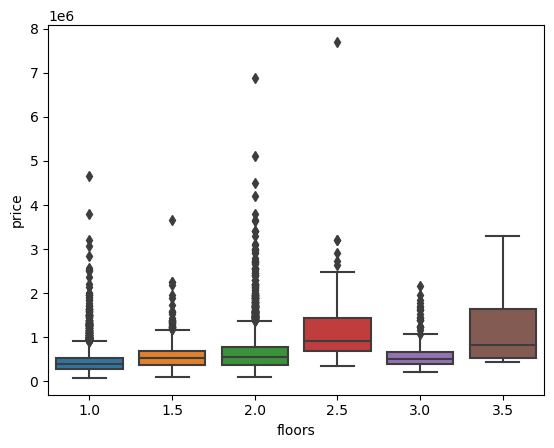

In [25]:
sns.boxplot(x='floors',y='price',data=df)
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

(0.0, 8081250.0)

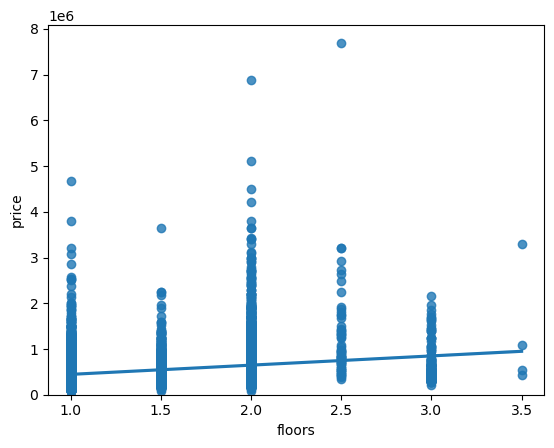

In [26]:
sns.regplot(x='floors',y='price',data=df)
plt.ylim(0,)

In [27]:
df.corr()['price'].sort_values()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14536\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.042837
long             0.019508
yr_built         0.035259
condition        0.046191
sqft_lot15       0.095143
sqft_lot         0.114042
yr_renovated     0.135524
floors           0.286252
lat              0.311305
bedrooms         0.311724
sqft_basement    0.319051
view             0.384987
bathrooms        0.528622
sqft_living15    0.597820
sqft_above       0.606955
grade            0.664251
sqft_living      0.703130
price            1.000000
Name: price, dtype: float64

# MODEL DEVELOPMENT

In [28]:
from sklearn.linear_model import LinearRegression
X = (df[['long',"floors","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","sqft_living"]])
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.6311056852642287

In [29]:
from sklearn.metrics import r2_score
lm=LinearRegression()
x=df[['sqft_living']]
y=df[['price']]
lm.fit(x,y)
y_pred=lm.predict(x)
r2=r2_score(y,y_pred)
print(r2)

0.494391881150825


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [31]:
features =["floors","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

X_train, X_test, y_train, y_test  = train_test_split(X_scaled, Y, test_size=0.20, random_state=42)


print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 2146
number of training samples: 8580


In [35]:
from sklearn.metrics import r2_score
lm=LinearRegression()
lm.fit(X_test,y_test)
y_pred=lm.predict(x)
r2=r2_score(y,y_pred)
print(r2)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 10 features as input.

In [91]:
# test 20 or train 80 
p=PolynomialFeatures(degree=2)
X_train_p=p.fit_transform(X_train)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train,y_train)
RigeModel.score(X_train,y_train)

0.6358074270136054

In [84]:
p=PolynomialFeatures(degree=2)
X_train_p=p.fit_transform(X_train)
X_test_p=p.fit_transform(X_test)
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(X_train,y_train)
RigeModel.score(X_test,y_test)

0.62910798615711

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [86]:
classifier= RandomForestRegressor(n_estimators=100)

In [87]:
classifier.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
y_pred=classifier.predict(X_test)

In [89]:
r2_score(y_test,y_pred)

0.8020891256857159

In [92]:
y_pred=classifier.predict(X_train)

In [93]:
r2_score(y_train,y_pred)

0.9677563869613568


# CONCLUSION

In conclusion, the "House Sales in King County, USA" project aimed to analyze house sales data and predict house prices using machine learning techniques. Through rigorous exploration, preprocessing, and model evaluation, we've gained valuable insights into the factors influencing property values.

Model Evaluation: After evaluating various machine learning algorithms, including all, we have found that the Random Forest Regressor consistently outperforms other models in terms of accuracy.


# Done By: